Data Test : arya
20240919 - Covid19 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

The first 5 rows from COVID 19 dataset.

In [ ]:

covid19= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
file = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv'

df =  pd.read_csv(file)

print(covid19)
print("\nDataset information:")
print(covid19.info())
print("\nMissing data information:")
print(covid19.isna().sum())



       Province/State  Country/Region          Last Update  Confirmed  Deaths  \
0               Hubei           China  2020-03-17T11:53:10      67799    3111   
1                 NaN           Italy  2020-03-17T18:33:02      31506    2503   
2                 NaN            Iran  2020-03-17T15:13:09      16169     988   
3                 NaN           Spain  2020-03-17T20:53:02      11748     533   
4                 NaN         Germany  2020-03-17T18:53:02       9257      24   
..                ...             ...                  ...        ...     ...   
307             Wales  United Kingdom  2020-03-17T11:53:10          0       5   
308               NaN           Nauru  2020-03-17T11:53:10          0       0   
309              Niue     New Zealand  2020-03-17T11:53:10          0       0   
310               NaN          Tuvalu  2020-03-17T11:53:10          0       0   
311  Pitcairn Islands  United Kingdom  2020-03-17T11:53:10          0       0   

     Recovered  Latitude  L

The Latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (Covid-19)

In [ ]:

df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()






,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,26,0,1,25
1,Albania,55,1,0,54
2,Algeria,60,4,12,44
3,Andorra,39,0,1,38
4,Antarctica,0,0,0,0
...,...,...,...,...,...
163,Uzbekistan,10,0,0,10
164,Venezuela,33,0,0,33
165,Vietnam,66,0,16,50
166,Winter Olympics 2022,0,0,0,0


The latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise.

In [ ]:
df.groupby(['Country/Region', 'Province/State'])[['Confirmed', 'Deaths', 'Recovered']].max()



Confirmed  Deaths  Recovered
Country/Region Province/State                                            
Australia      Australian Capital Territory          2       0          0
               From Diamond Princess                 0       0          0
               New South Wales                     210       4          4
               Northern Territory                    1       0          0
               Queensland                           78       0          8
...                                                ...     ...        ...
United Kingdom Northern Ireland                      0       0          0
               Pitcairn Islands                      0       0          0
               Scotland                              0      11          0
               Unknown                            1950       2         52
               Wales                                 0       5          0

[154 rows x 3 columns]

The Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19).

In [ ]:
data_china = df[df['Country/Region']=='China']
data_china = data_china[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
data_china.sort_values(by='Confirmed', ascending=False)
# result = result.reset_index(drop=True)


,Province/State,Confirmed,Deaths,Recovered
0,Hubei,67799,3111,56003
12,Guangdong,1364,8,1307
14,Henan,1273,22,1250
16,Zhejiang,1232,1,1216
19,Hunan,1018,4,1014
20,Anhui,990,6,984
22,Jiangxi,935,1,934
24,Shandong,761,7,746
27,Jiangsu,631,0,631
28,Chongqing,576,6,570


The latest country wise deaths cases of Novel Coronavirus (COVID-19).

In [ ]:
data_covid19 = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
data_covid19[data_covid19['Deaths']>0][['Country/Region', 'Deaths']]


,Country/Region,Deaths
1,Albania,1
2,Algeria,4
6,Argentina,2
9,Australia,5
10,Austria,3
11,Azerbaijan,1
12,Bahrain,1
16,Belgium,10
21,Brazil,1
23,Bulgaria,2


List countries with no cases of Novel Coronavirus (COVID-19) recovered.

In [ ]:
free_country = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
free_country[free_country['Recovered']==0][['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]


,Country/Region,Confirmed,Deaths,Recovered
1,Albania,55,1,0
4,Antarctica,0,0,0
5,Antigua and Barbuda,1,0,0
8,Aruba,3,0,0
14,Barbados,2,0,0
...,...,...,...,...
162,Uruguay,29,0,0
163,Uzbekistan,10,0,0
164,Venezuela,33,0,0
166,Winter Olympics 2022,0,0,0


List countries with all cases of Novel Coronavirus (COVID-19) died.

In [ ]:
df_death = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


result = (df_death.loc[df_death['Confirmed'] == df_death['Deaths']]
          .loc[df_death['Confirmed'] > 0]
          .sort_values('Confirmed', ascending=False)
          .reset_index(drop=True)
          [['Country/Region', 'Confirmed', 'Deaths']])

print(result)

  Country/Region  Confirmed  Deaths
0          Sudan          1       1


<ipython-input-49-0d62fcc3437d>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = (df_death[df_death['Confirmed'] == df_death['Deaths']]


List countries with all cases of Novel Coronavirus (COVID-19) recovered.

In [ ]:
df_recovered = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


result = (df_recovered.loc[df_recovered['Confirmed'] == df_recovered['Recovered']]
          .loc[df_recovered['Confirmed'] > 0]
          .sort_values('Confirmed', ascending=False)
          .reset_index(drop=True)
          [['Country/Region', 'Confirmed', 'Recovered']])

print(result)



  Country/Region  Confirmed  Recovered
0          Nepal          1          1


Top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).

In [ ]:
data = df.groupby('Country/Region')[['Confirmed','Deaths', 'Recovered']].max()
top_10 = data.nlargest(10, 'Confirmed')

print(top_10)

                Confirmed  Deaths  Recovered
Country/Region                              
China               67799    3111      56003
Italy               31506    2503       2941
Iran                16169     988       5389
Spain               11748     533       1028
Germany              9257      24         67
Korea, South         8320      81       1407
France               7652     148         12
Switzerland          2700      40          4
United Kingdom       1950     198         52
US                   1706      55          6


A plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150.

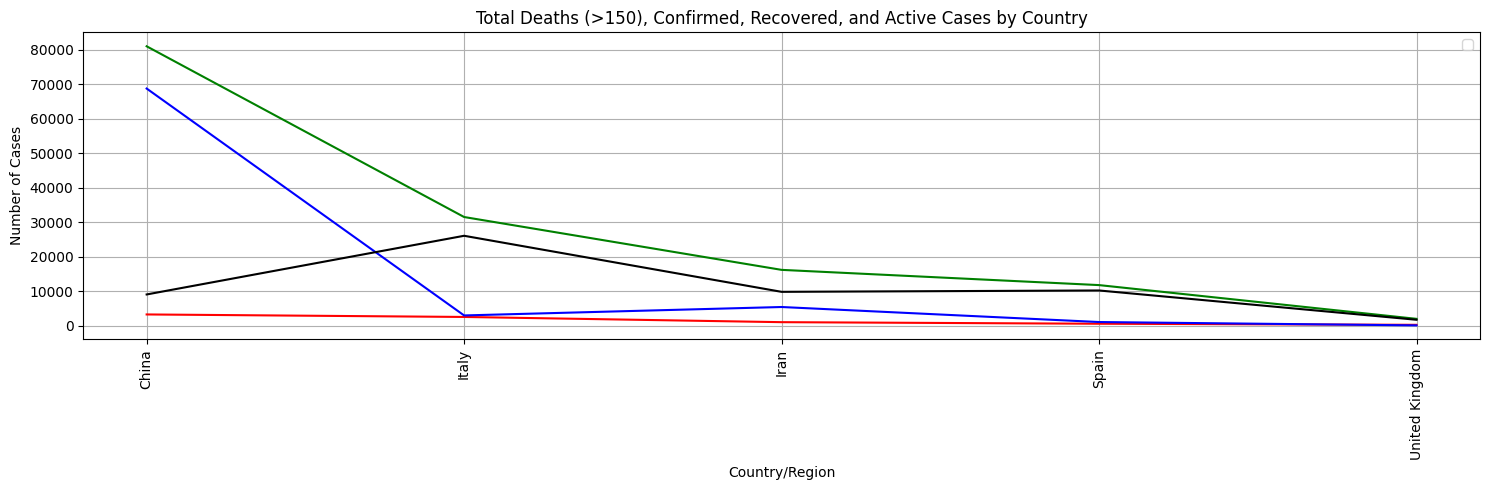

In [ ]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
plot_data = df.groupby(["Country/Region"])[["Deaths", "Confirmed", "Recovered", "Active"]].sum().reset_index()
plot_data = plot_data.sort_values(by='Deaths', ascending=False)
plot_data = plot_data[plot_data['Deaths']>150]

plt.figure(figsize=(15, 5))
plt.plot(plot_data['Country/Region'], plot_data['Deaths'], color='red')
plt.plot(plot_data['Country/Region'], plot_data['Confirmed'], color='green')
plt.plot(plot_data['Country/Region'], plot_data['Recovered'], color='blue')
plt.plot(plot_data['Country/Region'], plot_data['Active'], color='black')

plt.title('Total Deaths (>150), Confirmed, Recovered, and Active Cases by Country')
plt.xlabel('Country/Region')
plt.ylabel('Number of Cases')

plt.legend()
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()



The state/province wise death cases of Novel Coronavirus (COVID-19) in USA.

In [ ]:
# Convert relevant columns to numeric type before summing
numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']  # Add other relevant columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Now perform the sum and filtering
df[df.sum(axis=1, numeric_only=True) > 0]

df.groupby(['Province/State'])['Deaths'].sum().reset_index()
usa_data_death = df[df['Deaths'] > 0]
state_fig = px.bar(usa_data_death, x='Province/State', y='Deaths', title='State wise deaths reported of COVID-19 in USA', text='Deaths')
state_fig.show()



Visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA.

In [ ]:
# Convert relevant columns to numeric type before summing
numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']  # Add other relevant columns if needed
for col in numeric_cols:
    us_df[col] = pd.to_numeric(us_df[col], errors='coerce') # Convert each column individually

# Now perform the sum and filtering
us_df = us_df[us_df.sum(axis=1, numeric_only=True) > 0] # Specify numeric_only to sum only numeric values

us_df = us_df.groupby(['Province/State'])['Active'].sum().reset_index()
us_data_death = us_df[us_df['Active'] > 0]
state_fig = px.bar(us_data_death, x='Province/State', y='Active', title='State wise recovery cases of COVID-19 in USA', text='Active')
state_fig.show()

Visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in USA.

In [ ]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
df[df['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
# us_df = us_df[us_df.sum(axis = 1) > 0]
us_df = us_df.groupby(['Province/State'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
us_df = pd.melt(us_df, id_vars='Province/State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Case') # Assign the result of pd.melt back to us_df
fig = px.bar(us_df, x='Province/State', y='Count', text='Count', barmode='group', color='Case', title='USA State wise combine number of confirmed, deaths, recovered, active COVID-19 cases')
fig.show()


Visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time.

In [ ]:
grouped = df.groupby('Last Update')[['Confirmed', 'Deaths']].sum().reset_index()
fig = px.line(grouped, x="Last Update", y="Confirmed",
             title="Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time")
fig.show()